# Business Understanding

We are analyzing from the point of view of a homeowner and private flipper in King County, Washington looking to increase the value of their home through efficient rennovations. Our value is defined as the overall price of the home, and our variables are iterated over three models to see how some factors change the overall value. Not only will our modeling and analysis help our stakeholder understand King County specifically, but it well provide inferential understanding to help them decide which aspects of home rennovation can give them the best return on investment.

# Data Understanding

We gathered our data from the King County Sales from 2014 to 2015. 


Some of our limitations stemmed from the fact that our data was collected from the range of 2014-2015. This prevented us from seeing how a current homeowner could use our model while understanding the inflation rate as well as the change in value in the current time period. Another data limitation that we faced, was understanding how rennovation is defined consistently across homeowners, while costs of rennovation are difficult to incorporate, we

Load libraries and main dataset

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data/Master_Dataset.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,...,grade_int_11,grade_int_12,grade_int_13,grade_int_3,grade_int_4,grade_int_5,grade_int_6,grade_int_7,grade_int_8,grade_int_9
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,1180,...,0,0,0,0,0,0,0,1,0,0
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,2170,...,0,0,0,0,0,0,0,1,0,0
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,770,...,0,0,0,0,0,0,1,0,0,0
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,1050,...,0,0,0,0,0,0,0,1,0,0
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,1680,...,0,0,0,0,0,0,0,0,1,0


Create list of continuous variables

In [3]:
columns = ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
                'floors', 'sqft_above', 'yr_built']

Linearity and multicolinearity tests using pairplot and heatmap, respectively.

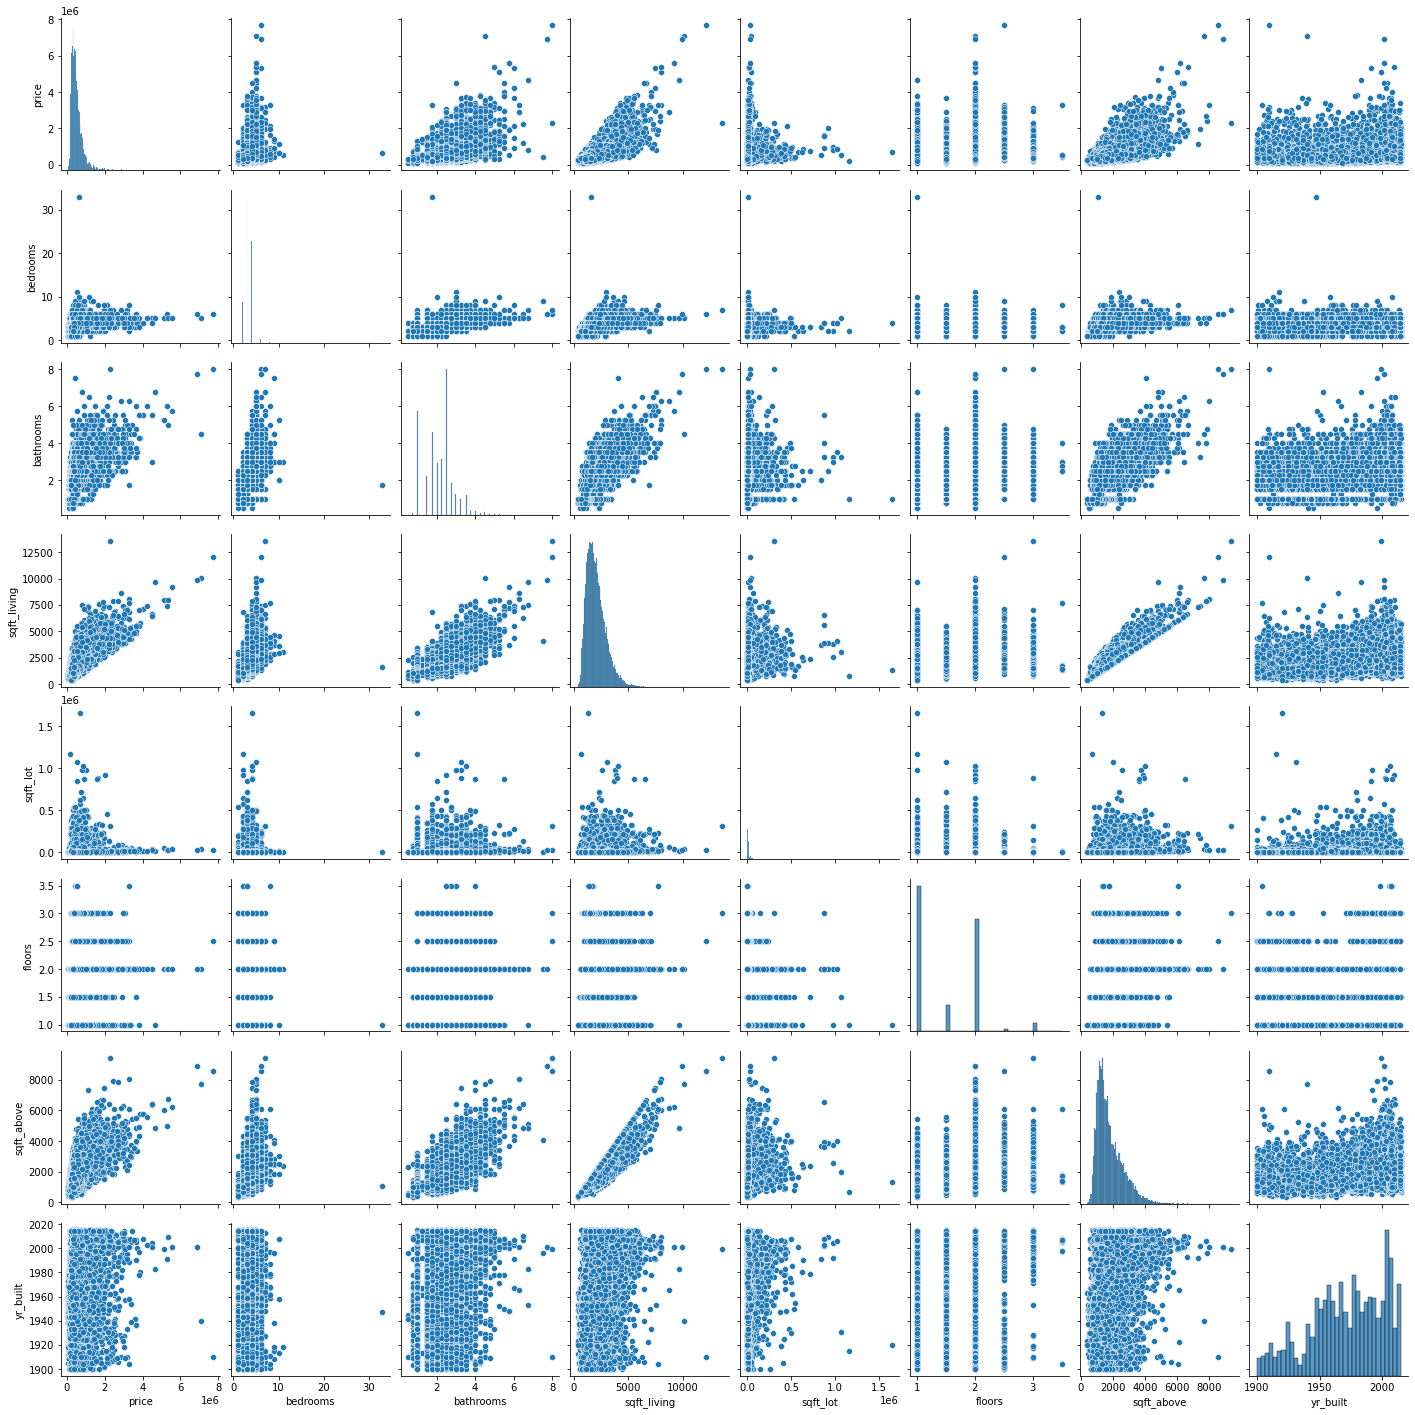

In [4]:
sns.pairplot(df[columns]);

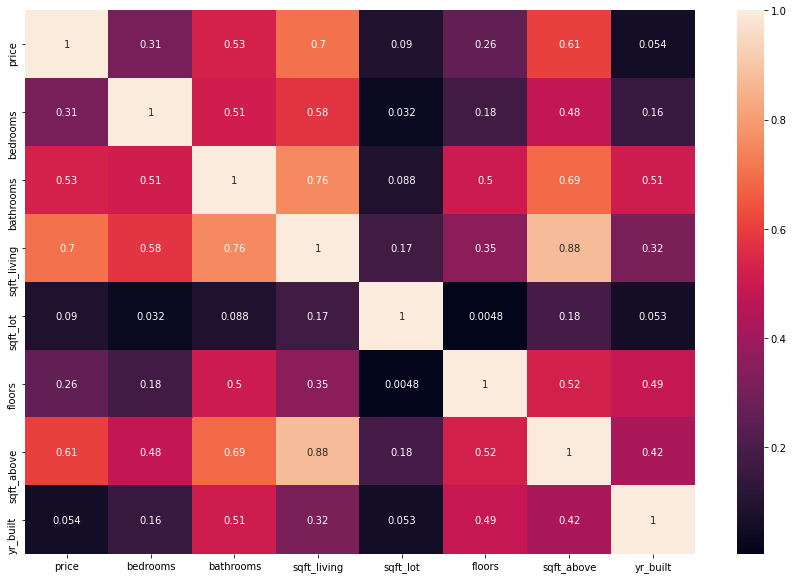

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(df[columns].corr().abs(), annot=True);

Linearity test passed. Highly multicolinear pairs with a correlation coefficient > 0.75 include (sqft_living and sqft_above) as well as (sqft_living and bathrooms). Will remove sqft_living as it is involved in both highly multicolinear pairs.

Train-test split, 75/25 

# Baseline Model and Model 1

In [6]:
x_columns = ['bedrooms', 'bathrooms', 'sqft_lot', 
                'floors', 'sqft_above', 'yr_built']
X = df[x_columns]
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=10)

In [7]:
dummy_reg = DummyRegressor(strategy='mean')
dummy_reg.fit(X_train, y_train)
dummy_reg.predict(X_train)
dummy_reg.score(X_train, y_train)

0.0

In [8]:
display(X_train.head())
display(X_test.head())

,bedrooms,bathrooms,sqft_lot,floors,sqft_above,yr_built
5362,4,2.50,9750,2.0,2160,1983
12174,4,3.25,17820,1.0,2630,1975
10807,2,1.00,7228,1.0,1000,1947
12964,3,1.50,10956,1.0,1840,1970
3405,4,2.25,12007,1.0,1220,1979


,bedrooms,bathrooms,sqft_lot,floors,sqft_above,yr_built
19317,3,2.25,6600,2.0,1670,1990
13025,4,2.75,15000,1.0,1690,1976
9602,2,1.00,5395,1.0,860,1940
9727,3,1.00,21183,1.0,1030,1955
1088,4,2.00,11700,1.0,1850,1969


In [9]:
# Fit Scalar to Train
ss = StandardScaler()
ss.fit(X_train)

# Transform Train
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

#Instantiate LR object
lr = LinearRegression()
# fit the model on the training set
lr.fit(X_train, y_train)
# Check the R^2 of the training data
lr.score(X_train, y_train)

0.4806510519320769

In [10]:
lr.coef_ #coefficients align with our variable matrix

array([-3.86406977e+04,  1.89965302e+05, -2.53700144e-01, -3.67412749e+04,
        2.48667818e+02, -4.25793946e+03])

In [11]:
lr.score(X_test, y_test) #R-squared for our test set

0.4811726163401887

In [12]:
lr.fit(X_train_scaled, y_train)
lr.score(X_train_scaled, y_train), lr.score(X_test_scaled, y_test) #R-Squared for our final tests

(0.4806510519320768, 0.4811726163401482)

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)


y_hat_train = lr.predict(X_train_scaled)
y_hat_test = lr.predict(X_test_scaled)


train_rmse = (mean_squared_error(y_train, y_hat_train)**.5)
test_rmse = (mean_squared_error(y_test, y_hat_test)**.5)

print(train_rmse, test_rmse)

266690.3543281978 258661.99523211346


The R-squared value for Model 1 is 0.481. This tells us that our x-variables (Bedrooms, Bathrooms, Sqft-Lot, Floors, SqFt-Above, and Yr-built) account for 48% of variability in our price or value of the house. 

We also analyzed the root mean squared error (RMSE) which was $258662. Outside of our R-Squared our RMSE is a metric error in our model. We chose RMSE over Absoulte Mean Squared Error because AMSE is highly biased for higher values. RMSE is better in terms of reflecting performance when dealing with large error values, and in this case, housing prices. 

We then decided to conduct recursive feature elimination to understand which variables to include in future model iterations. This step is very important as it can help us understand which variables we should include as we move to the next model!

# Recursive Feature Elimination

Recursive Feature Elimination helps us understand how we rank our variables in order of importance associated with our y variable. Below we conduct these steps to see how we can make an iteration of our first model as we move towards our second.

In [14]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel

lr_rfe = LinearRegression() #instantiate the model 
select = RFE(lr_rfe, n_features_to_select=2) 
ss = StandardScaler() 
ss.fit(X)
lr_scaled = ss.transform(X) #dropping your target 
select.fit(X= X, y=y)

select.support_ #tells you which features you selected in boolean array 
select.ranking_ #match up which predictors have the best ranking according to head

array([1, 1, 5, 2, 4, 3])

In [15]:
display(X_train.head())
display(X_test.head())

,bedrooms,bathrooms,sqft_lot,floors,sqft_above,yr_built
5362,4,2.50,9750,2.0,2160,1983
12174,4,3.25,17820,1.0,2630,1975
10807,2,1.00,7228,1.0,1000,1947
12964,3,1.50,10956,1.0,1840,1970
3405,4,2.25,12007,1.0,1220,1979


,bedrooms,bathrooms,sqft_lot,floors,sqft_above,yr_built
19317,3,2.25,6600,2.0,1670,1990
13025,4,2.75,15000,1.0,1690,1976
9602,2,1.00,5395,1.0,860,1940
9727,3,1.00,21183,1.0,1030,1955
1088,4,2.00,11700,1.0,1850,1969


We can see that the square foot of the lot within the house is the lowest ranked variable after we conducted our recursive feature elimination. We will drop that feature from future iterations.

# Model 2

Here we tried using sqft_living as the sole independent variable.

In [16]:
x_columns = ['sqft_living'] 
X = df[x_columns]
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=10)
display(X_train.head())
display(X_test.head())

,sqft_living
5362,2160
12174,3860
10807,1000
12964,1840
3405,2080


,sqft_living
19317,1670
13025,2630
9602,1160
9727,1730
1088,1850


In [17]:
# Fit Scalar to Train
ss = StandardScaler()
ss.fit(X_train)

# Transform Train
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

#Instantiate LR object
lr = LinearRegression()
# fit the model on the training set
lr.fit(X_train, y_train)
# Check the R^2 of the training data
lr.score(X_train, y_train)

0.4908802043490703

In [18]:
lr.coef_

array([281.22424098])

In [19]:
lr.score(X_test, y_test)

0.49838128371378476

In [20]:
lr.fit(X_train_scaled, y_train)
lr.score(X_train_scaled, y_train), lr.score(X_test_scaled, y_test)

(0.4908802043490702, 0.49838128371378476)

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)


y_hat_train = lr.predict(X_train_scaled)
y_hat_test = lr.predict(X_test_scaled)


train_rmse = (mean_squared_error(y_train, y_hat_train)**.5)
test_rmse = (mean_squared_error(y_test, y_hat_test)**.5)

print(train_rmse, test_rmse)

264050.91214168555 254336.12162848245


The R-squared value of Model 2 is 0.498 which is an improvement on Model 1. This tells us that our x-variable (sqft_living) accounts for 50% of variability in house sale price. <br>
RMSE was $254336.12.

# Model 3

Prior to developing Model 3 we discovered an outlier with 33 bedrooms but a normal sqft_living which led us to believe that the number of bedroom was an error. Thus, we decided to remove that home from future analyses. <br>
For Model 3 we explored the continuous independent variables of bedrooms, bathrooms, sqft_living as well as the categorical independent variable of condition.

In [22]:
df.drop(df[df['bedrooms'] == 33].index, inplace = True)

In [23]:
x_columns = ['bedrooms', 'bathrooms', 'sqft_living', 
             'condition_Poor', 'condition_Fair', 'condition_Good', 'condition_Very Good']
X = df[x_columns]
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=10)

In [24]:
X.corr().abs()

,bedrooms,bathrooms,sqft_living,condition_Poor,condition_Fair,condition_Good,condition_Very Good
bedrooms,1.000000,0.527870,0.593178,0.033263,0.050543,0.009176,0.022992
bathrooms,0.527870,1.000000,0.755755,0.042933,0.075935,0.166771,0.034699
sqft_living,0.593178,0.755755,1.000000,0.033247,0.063987,0.083865,0.018210
condition_Poor,0.033263,0.042933,0.033247,1.000000,0.003266,0.021898,0.010719
condition_Fair,0.050543,0.075935,0.063987,0.003266,1.000000,0.053193,0.026037
condition_Good,0.009176,0.166771,0.083865,0.021898,0.053193,1.000000,0.174559
condition_Very Good,0.022992,0.034699,0.018210,0.010719,0.026037,0.174559,1.000000


In [25]:
display(X_train.head())
display(X_test.head())

,bedrooms,bathrooms,sqft_living,condition_Poor,condition_Fair,condition_Good,condition_Very Good
12173,4,1.75,1920,0,0,1,0
10806,3,2.25,1690,0,0,0,1
12963,5,2.00,1220,0,0,1,0
3405,4,2.25,2080,0,0,1,0
6474,2,1.00,730,0,0,0,0


,bedrooms,bathrooms,sqft_living,condition_Poor,condition_Fair,condition_Good,condition_Very Good
12075,4,1.50,2120,0,0,1,0
12051,4,1.00,1480,0,0,0,0
4928,4,2.50,1950,0,0,0,0
9726,3,1.75,1240,0,0,0,0
1088,4,2.00,1850,0,0,1,0


In [26]:
# Fit Scalar to Train
ss = StandardScaler()
ss.fit(X_train)

# Transform Train
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

#Instantiate LR object
lr = LinearRegression()
# fit the model on the training set
lr.fit(X_train, y_train)
# Check the R^2 of the training data
lr.score(X_train, y_train)

0.5122779149053287

In [27]:
lr.coef_

array([-67590.8221813 ,  19473.51947504,    310.05950052,  19371.67781273,
        -7501.37373747,  46529.70589826, 114379.58728587])

In [28]:
lr.score(X_test, y_test)

0.5313084335559193

In [29]:
lr.fit(X_train_scaled, y_train)
lr.score(X_train_scaled, y_train), lr.score(X_test_scaled, y_test)

(0.5122779149053287, 0.5313084335559188)

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)


y_hat_train = lr.predict(X_train_scaled)
y_hat_test = lr.predict(X_test_scaled)


train_rmse = (mean_squared_error(y_train, y_hat_train)**.5)
test_rmse = (mean_squared_error(y_test, y_hat_test)**.5)

print(train_rmse, test_rmse)

257378.0008519639 249078.80240825086


The R-squared value of Model 3 is 0.531 which is an improvement on Model 2. This tells us that our x-variables account for 53% of variability in house sale price. However, multicollinearity between bathrooms and sqft_living may be playing a role. <br>
RMSE was $249078.80.

# Model 4

For Model 4 we performed featuring engineering to address the multicollinearity between bathrroms and sqft_living as well as to improve model fit.<br>
For Model 4 we explored the continuous independent variables of bedrooms, floor_to_bath, and sqft_living as well as the categorical independent variable of condition.

In [31]:
df['floors'].value_counts()

1.0    10672
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [32]:
df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [33]:
df['floors/bathrooms'] = df['floors'] / df['bathrooms']
df['floors/bathrooms']

0        1.000000
1        0.888889
2        1.000000
3        0.333333
4        0.500000
           ...   
21592    1.200000
21593    0.800000
21594    2.666667
21595    0.800000
21596    2.666667
Name: floors/bathrooms, Length: 21596, dtype: float64

In [34]:
df_expanded = df
df_expanded['bath_to_bed'] = (df.bathrooms)/(df.bedrooms)
df_expanded['sqftL_to_bath'] = (df.sqft_living)/(df.bathrooms)
df_expanded['bath_to_sqftL'] = (df.bathrooms)/(df.sqft_living)
df_expanded['sqftL_to_bed'] = (df.sqft_living)/(df.bedrooms)
df_expanded['sqftL_to_floor'] = (df.sqft_living)/(df.floors)
df_expanded['sqftL_to_sgftLot'] = (df.sqft_living)/(df.sqft_lot)
df_expanded['bedbath_sum'] = (df.bedrooms) + (df.bathrooms)
df_expanded['floor_to_bath'] = (df.floors)/(df.bathrooms)
df_expanded['bath_to_floor'] = (df.bathrooms)/(df.floors)
df_expanded.corr().abs()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,...,floors/bathrooms,bath_to_bed,sqftL_to_bath,bath_to_sqftL,sqftL_to_bed,sqftL_to_floor,sqftL_to_sgftLot,bedbath_sum,floor_to_bath,bath_to_floor
Unnamed: 0,1.000000,0.006722,0.027426,0.009046,0.107077,0.044894,0.027173,0.180067,0.072288,0.040210,...,0.051594,0.115202,0.068454,0.087790,0.041945,0.076651,0.215923,0.061838,0.051594,0.055460
id,0.006722,1.000000,0.016763,0.002328,0.005145,0.012258,0.131920,0.018576,0.010831,0.004336,...,0.000354,0.010591,0.024802,0.018778,0.012016,0.020584,0.088232,0.004141,0.000354,0.008407
price,0.027426,0.016763,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.605392,0.321103,...,0.207315,0.281312,0.278214,0.268959,0.580236,0.432428,0.123066,0.471429,0.207315,0.241108
bedrooms,0.009046,0.002328,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,0.492543,0.303517,...,0.338275,0.237756,0.206214,0.245058,0.020671,0.431757,0.027760,0.894944,0.338275,0.349047
bathrooms,0.107077,0.005145,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.686664,0.278504,...,0.532784,0.652727,0.210666,0.191625,0.517443,0.361873,0.287012,0.851365,0.532784,0.518497
sqft_living,0.044894,0.012258,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,0.876448,0.428683,...,0.382090,0.310683,0.428917,0.437281,0.755462,0.650501,0.076984,0.763392,0.382090,0.378349
sqft_lot,0.027173,0.131920,0.089879,0.033602,0.088368,0.173449,1.000000,0.004824,0.184134,0.015038,...,0.073587,0.063289,0.113974,0.118517,0.190587,0.148770,0.252603,0.067177,0.073587,0.078787
floors,0.180067,0.018576,0.256820,0.183707,0.502574,0.353941,0.004824,1.000000,0.523970,0.241845,...,0.376228,0.421135,0.115723,0.168043,0.290595,0.393866,0.556703,0.377483,0.376228,0.421083
sqft_above,0.072288,0.010831,0.605392,0.492543,0.686664,0.876448,0.184134,0.523970,1.000000,0.051149,...,0.185091,0.309930,0.333788,0.354948,0.671159,0.347262,0.051605,0.664940,0.185091,0.118320
sqft_basement,0.040210,0.004336,0.321103,0.303517,0.278504,0.428683,0.015038,0.241845,0.051149,1.000000,...,0.439602,0.063401,0.263012,0.240296,0.307045,0.687901,0.062013,0.333771,0.439602,0.552849


In [35]:
x_columns = ['bedrooms', 'floor_to_bath', 'sqft_living', 
             'condition_Poor', 'condition_Fair', 'condition_Good', 'condition_Very Good']
X = df[x_columns]
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=10)
display(X_train.head())
display(X_test.head())

,bedrooms,floor_to_bath,sqft_living,condition_Poor,condition_Fair,condition_Good,condition_Very Good
12173,4,0.571429,1920,0,0,1,0
10806,3,0.444444,1690,0,0,0,1
12963,5,0.500000,1220,0,0,1,0
3405,4,0.444444,2080,0,0,1,0
6474,2,1.000000,730,0,0,0,0


,bedrooms,floor_to_bath,sqft_living,condition_Poor,condition_Fair,condition_Good,condition_Very Good
12075,4,0.666667,2120,0,0,1,0
12051,4,1.500000,1480,0,0,0,0
4928,4,0.800000,1950,0,0,0,0
9726,3,0.571429,1240,0,0,0,0
1088,4,0.500000,1850,0,0,1,0


In [36]:
# Fit Scalar to Train
ss = StandardScaler()
ss.fit(X_train)

# Transform Train
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

#Instantiate LR object
lr = LinearRegression()
# fit the model on the training set
lr.fit(X_train, y_train)
# Check the R^2 of the training data
lr.score(X_train, y_train)

0.5148897849610432

In [37]:
lr.coef_

array([-61054.55254159,  79506.33037036,    328.26119919,   5194.86788826,
       -17051.82931693,  47807.71546168, 119255.39057461])

In [38]:
lr.score(X_test, y_test)

0.5353607379836318

In [39]:
lr.fit(X_train_scaled, y_train)
lr.score(X_train_scaled, y_train), lr.score(X_test_scaled, y_test)

(0.5148897849610432, 0.5353607379836309)

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)


y_hat_train = lr.predict(X_train_scaled)
y_hat_test = lr.predict(X_test_scaled)


train_rmse = (mean_squared_error(y_train, y_hat_train)**.5)
test_rmse = (mean_squared_error(y_test, y_hat_test)**.5)

print(train_rmse, test_rmse)

256687.91490835955 247999.69795806892


The R-squared value of Model 4 is 0.535 which is an improvement on Model 3. This tells us that our x-variables account for 54% of variability in house sale price. Additionally, we addressed the multicollinearity issue of previous models. <br>
RMSE was $247999.70.

# Model 5

For Model 5 decided to add yr_built to the independent variables used in Model 4 as we anticipated that we could improve our model by taking the age of the home into account.<br>
For Model 5 we explored the continuous independent variables of bedrooms, floor_to_bath, sqft_living, and yr_built as well as the categorical independent variable of condition.

In [41]:
x_columns = ['bedrooms', 'floor_to_bath', 'sqft_living', 'yr_built', 
            'condition_Poor', 'condition_Fair', 'condition_Good', 'condition_Very Good']
X = df[x_columns]
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=10)
display(X_train.head())
display(X_test.head())

,bedrooms,floor_to_bath,sqft_living,yr_built,condition_Poor,condition_Fair,condition_Good,condition_Very Good
12173,4,0.571429,1920,1962,0,0,1,0
10806,3,0.444444,1690,1982,0,0,0,1
12963,5,0.500000,1220,1921,0,0,1,0
3405,4,0.444444,2080,1979,0,0,1,0
6474,2,1.000000,730,1934,0,0,0,0


,bedrooms,floor_to_bath,sqft_living,yr_built,condition_Poor,condition_Fair,condition_Good,condition_Very Good
12075,4,0.666667,2120,1977,0,0,1,0
12051,4,1.500000,1480,1940,0,0,0,0
4928,4,0.800000,1950,2004,0,0,0,0
9726,3,0.571429,1240,1986,0,0,0,0
1088,4,0.500000,1850,1969,0,0,1,0


In [42]:
# Fit Scalar to Train
ss = StandardScaler()
ss.fit(X_train)

# Transform Train
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

#Instantiate LR object
lr = LinearRegression()
# fit the model on the training set
lr.fit(X_train, y_train)
# Check the R^2 of the training data
lr.score(X_train, y_train)

0.5389157563592952

In [43]:
lr.coef_

array([-62863.30775778,  60136.22164975,    347.16472397,  -2245.51636855,
       -77720.71255873, -69601.81308446,   2779.43320181,  46333.11254224])

In [44]:
lr.score(X_test, y_test)

0.5643210197279767

In [45]:
lr.fit(X_train_scaled, y_train)
lr.score(X_train_scaled, y_train), lr.score(X_test_scaled, y_test)

(0.5389157563592952, 0.5643210197279769)

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)


y_hat_train = lr.predict(X_train_scaled)
y_hat_test = lr.predict(X_test_scaled)


train_rmse = (mean_squared_error(y_train, y_hat_train)**.5)
test_rmse = (mean_squared_error(y_test, y_hat_test)**.5)

print(train_rmse, test_rmse)

250250.7300546399 240146.6336921672


The R-squared value of Model 5 is 0.564 which is best for all the models run. This tells us that our x-variable (sqft_living) accounts for 56% of variability in house sale price. <br>
RMSE was $240146.63.

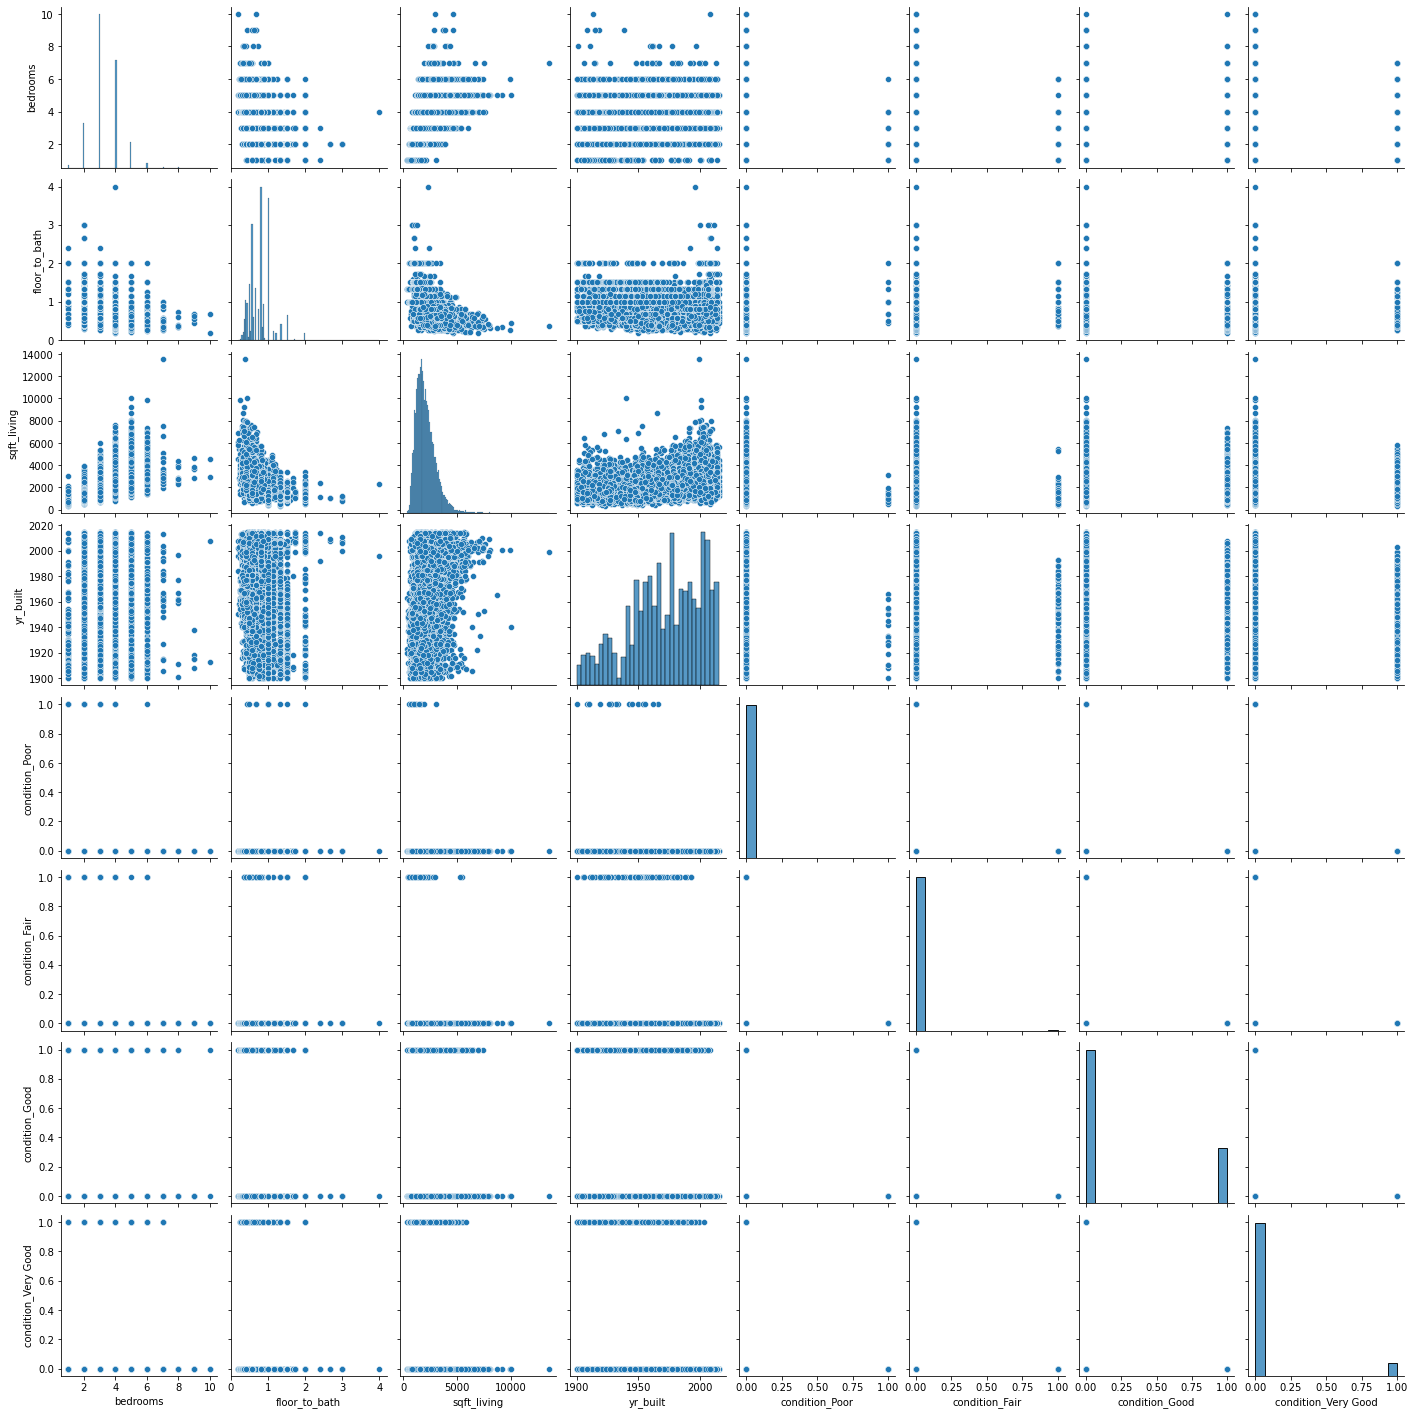

In [50]:
sns.pairplot(X_train);

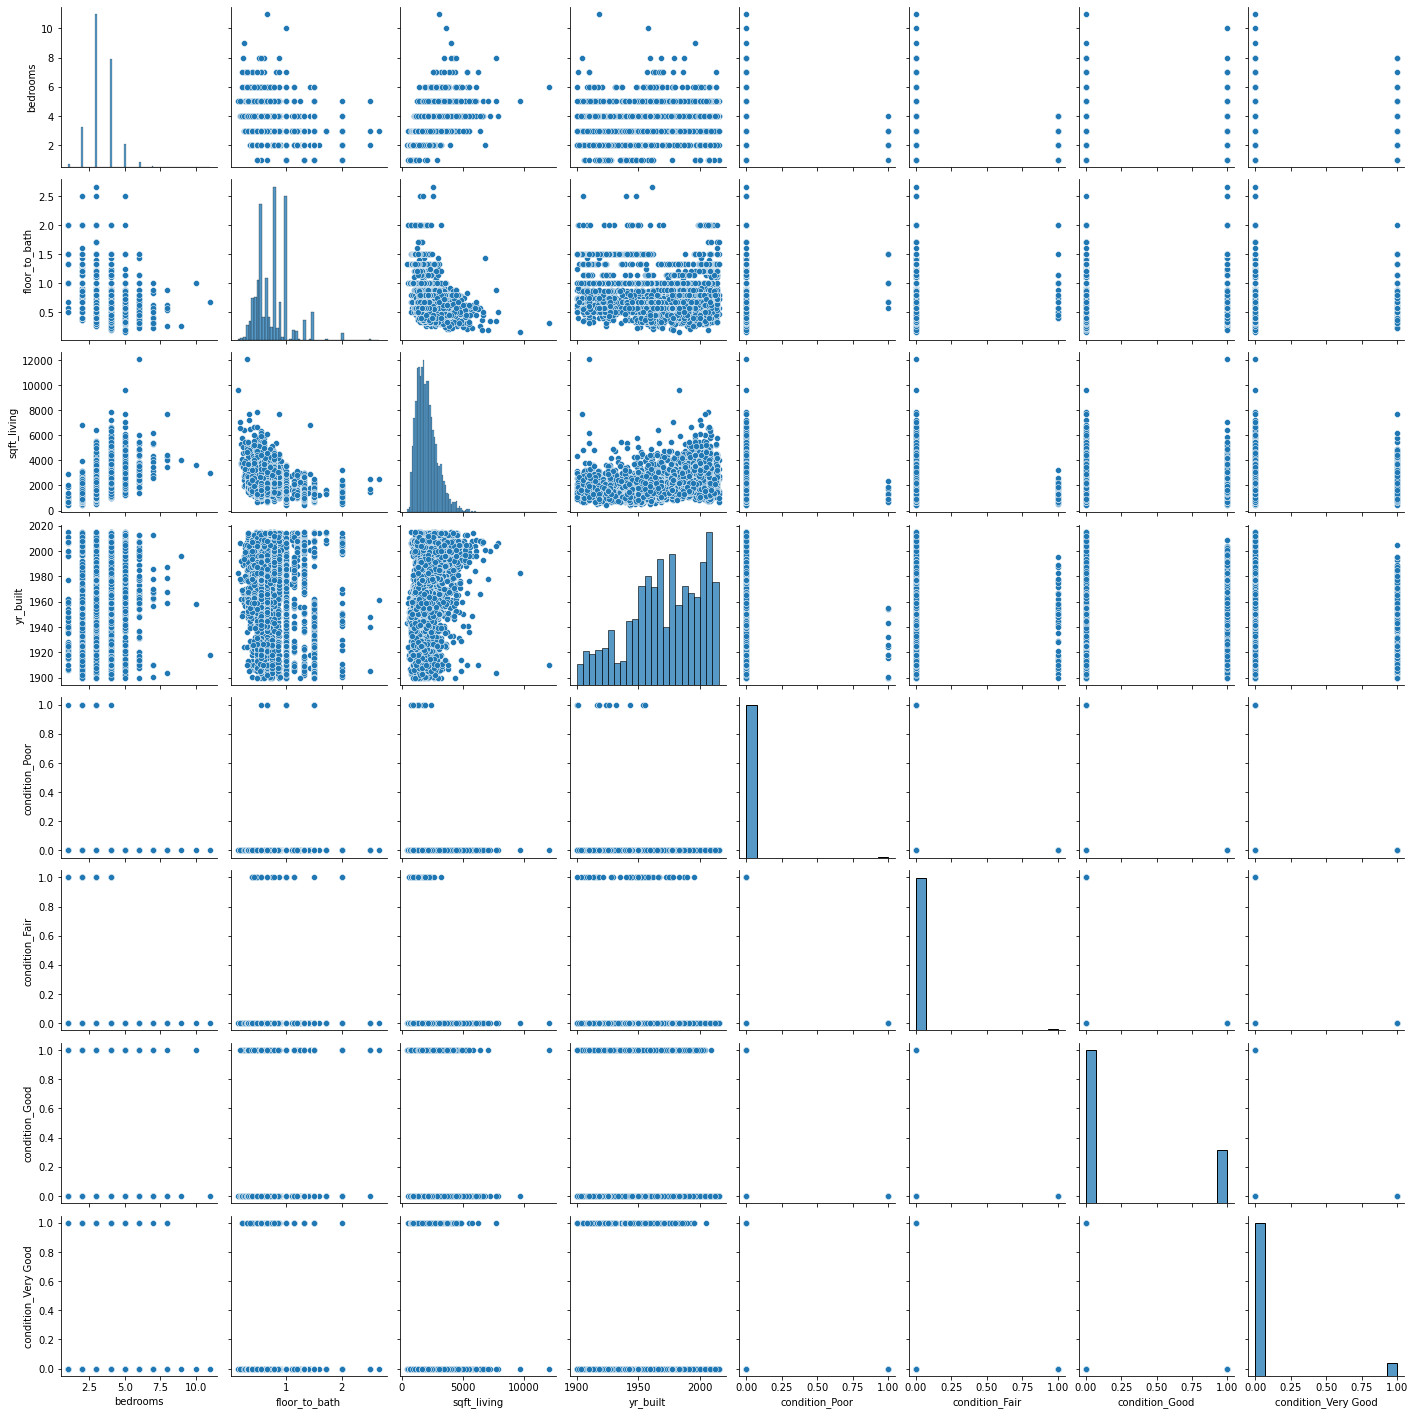

In [49]:
sns.pairplot(X_test);

In [53]:
final_df = pd.DataFrame(y_train).append(X_train, ignore_index=True)
final_df

,price,bedrooms,floor_to_bath,sqft_living,yr_built,condition_Poor,condition_Fair,condition_Good,condition_Very Good
0,170000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,318000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,469950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,442000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,217000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32389,NaN,4.0,0.800000,2750.0,1999.0,0.0,0.0,0.0,0.0
32390,NaN,5.0,0.615385,2480.0,1993.0,0.0,0.0,0.0,1.0
32391,NaN,4.0,0.800000,2790.0,1989.0,0.0,0.0,1.0,0.0
32392,NaN,2.0,0.571429,1540.0,1908.0,0.0,0.0,1.0,0.0


In [59]:
column_list = final_df.drop(['price'], axis=1).columns.values.tolist()
column_list

['bedrooms',
 'floor_to_bath',
 'sqft_living',
 'yr_built',
 'condition_Poor',
 'condition_Fair',
 'condition_Good',
 'condition_Very Good']

In [62]:
from seaborn_qqplot import pplot

pplot(final_df, x=column_list, y="price", 
      kind='qq', 
      height=4, aspect=2, 
      display_kws={"identity":False, "fit":True})

ModuleNotFoundError: No module named 'seaborn_qqplot'